## Desafio parte 1

### Descrição:

    - Análise exploratória para entendimento das principais características dos dados.

### Perguntas:
    
    - Quais são os estabelecimentos com maior número de reviews?
    - Quais são as categorias de estabelecimento?
    - A maior parte dos esabelecimentos são restaurantes?

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [67]:
df = pd.read_csv('data/X_trainToronto.csv')

In [68]:
df.drop(columns=['business_id','postal_code', 'address', 'loc'], inplace=True)

In [69]:
df.head()

,name,latitude,longitude,review_count,is_open,attributes,categories,hours,destaque
0,Salt Wine Bar,43.648977,-79.420495,99,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...",0
1,William's Beauty Supplies,43.654002,-79.452189,3,1,"{'BusinessParking': ""{'garage': False, 'street...","Beauty & Spas, Hair Salons, Barbers, Shopping,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1
2,Integra Health Centre,43.648493,-79.383214,18,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Health & Medical, Medical Centers","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0
3,North York General Hospital,43.772453,-79.448136,3,0,{'ByAppointmentOnly': 'False'},"Health & Medical, Hospitals, Medical Centers",NaN,0
4,Dr Jamie's Bike Clinic,43.665082,-79.460800,3,1,{'RestaurantsPriceRange2': '3'},"Automotive, Bikes, Shopping, Auto Repair, Spor...",NaN,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17582 entries, 0 to 17581
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          17582 non-null  object 
 1   latitude      17582 non-null  float64
 2   longitude     17582 non-null  float64
 3   review_count  17582 non-null  int64  
 4   is_open       17582 non-null  int64  
 5   attributes    15014 non-null  object 
 6   categories    17555 non-null  object 
 7   hours         12905 non-null  object 
 8   loc           17582 non-null  object 
 9   destaque      17582 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.3+ MB


<Axes: xlabel='review_count', ylabel='name'>

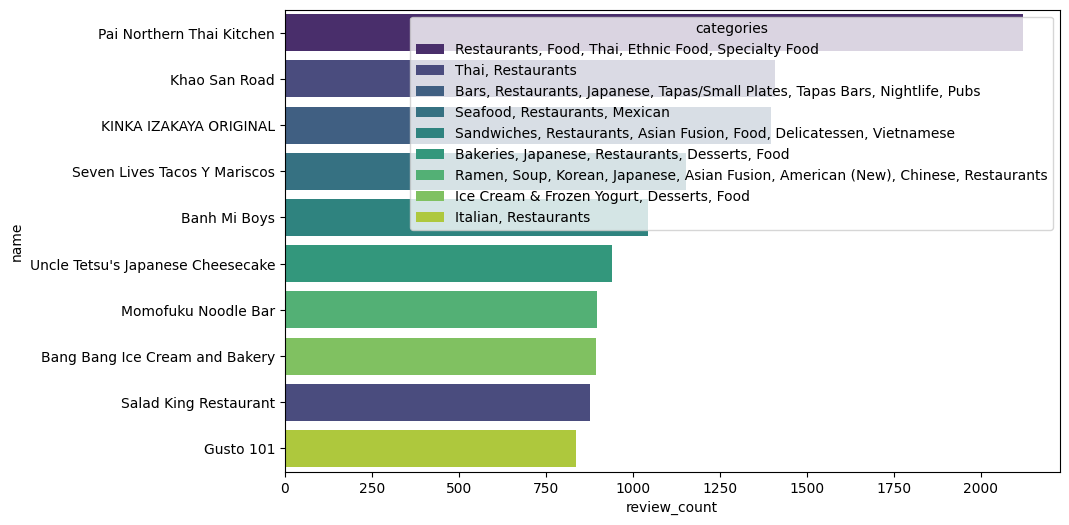

In [ ]:
## Quais são os estabelecimentos com maior número de reviews?
df_max_reviews = df[['name','categories','review_count']].sort_values(by='review_count',ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='review_count', y='name', hue='categories', data=df_max_reviews,palette='viridis')

/tmp/ipykernel_6171/3045093893.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')


<Axes: xlabel='count', ylabel='categories'>

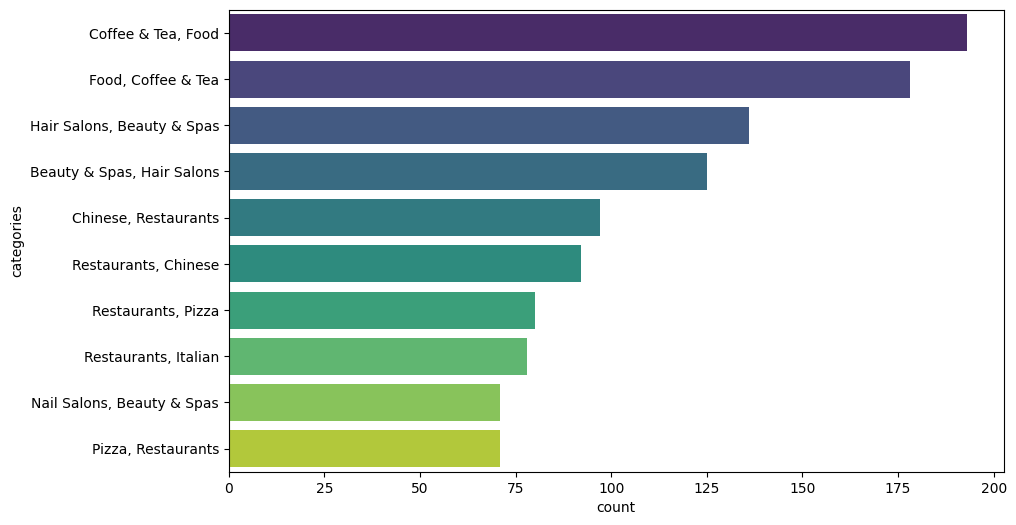

In [ ]:
## Quais são as categorias de estabelecimento?
# Algumas categorias estão 
df_categorias = df.groupby('categories').size().sort_values(ascending=False).head(10).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')

In [ ]:
df['useful'].max()

280

In [ ]:
df['funny'].max()

264

In [ ]:
df['cool'].max()

177

In [ ]:
df.groupby('name', 'cool')

,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,destaque,useful,funny,cool,text,date
0,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0,0,0,0,Beautiful room. \nTapas style food with great ...,2016-01-30 01:50:36
1,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0,0,0,0,"Salt how can we describe our night, four of us...",2018-04-15 17:49:02
2,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0,0,0,0,The food had great flavourm tadte and presenta...,2015-12-05 06:16:46
3,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0,2,0,2,Salt has an impressive menu that covers many t...,2011-09-27 00:34:17
4,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': ""{'romantic': False, 'intimate': ...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0,0,0,0,Came here last night with a friend after we le...,2012-03-31 18:31:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490958,Yorkville Chiropractic And Wellness Centre,94 Asquith Avenue,M4W 1J8,43.672366,-79.382885,5,1,{'ByAppointmentOnly': 'True'},"Orthotics, Massage Therapy, Chiropractors, Hea...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","{'type': 'Point', 'coordinates': [-79.382885, ...",0,2,0,0,Dr. Homer has been nothing but professional an...,2017-02-12 23:04:39
490959,Yorkville Chiropractic And Wellness Centre,94 Asquith Avenue,M4W 1J8,43.672366,-79.382885,5,1,{'ByAppointmentOnly': 'True'},"Orthotics, Massage Therapy, Chiropractors, Hea...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","{'type': 'Point', 'coordinates': [-79.382885, ...",0,5,0,0,"All the staff from the front office (Dale), to...",2015-04-20 21:06:46
490960,Yorkville Chiropractic And Wellness Centre,94 Asquith Avenue,M4W 1J8,43.672366,-79.382885,5,1,{'ByAppointmentOnly': 'True'},"Orthotics, Massage Therapy, Chiropractors, Hea...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","{'type': 'Point', 'coordinates': [-79.382885, ...",0,6,0,0,I met Dr. Homer on the Friends for Life rally ...,2014-11-19 21:12:04
490961,Yorkville Chiropractic And Wellness Centre,94 Asquith Avenue,M4W 1J8,43.672366,-79.382885,5,1,{'ByAppointmentOnly': 'True'},"Orthotics, Massage Therapy, Chiropractors, Hea...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","{'type': 'Point', 'coordinates': [-79.382885, ...",0,2,1,0,As a patient who suffered headaches and neck p...,2017-02-02 16:01:36


- As coluna categories possuem mais de um tipo de categoria.
- Selecinamos alguns tipos principais de categorias para fazer um agrupamento mais realista.
- Categorias: Restaurants, Coffee & Tea, Nightlife, Arts & Entertainment

In [ ]:
df = pd.read_csv('data/X_testToronto.csv')

# Split categories by comma and stack them into new rows
df_expanded = df['categories'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Assign a name to the new column created
df_expanded.name = 'category'

# Create a new DataFrame by joining the expanded categories with the original DataFrame
df_new = df.join(df_expanded)

df_new

,business_id,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,category
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Wine Bars
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Tapas/Small Plates
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Restaurants
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Bars
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Nightlife
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Restaurants, Cafes, Coffee & Tea, Coffee Roast...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Reflexology
1322,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Restaurants, Cafes, Coffee & Tea, Coffee Roast...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Massage
1323,PBYtC12Vvm5rwTh4zexcVg,Chill Ice House,82 Bathurst Street,M5V 2P3,43.643162,-79.402740,38,1,"{'HasTV': 'True', 'GoodForDancing': 'False', '...","Bars, Nightlife","{'Wednesday': '17:0-23:0', 'Thursday': '17:0-2...","{'type': 'Point', 'coordinates': [-79.40274003...",Shopping
1323,PBYtC12Vvm5rwTh4zexcVg,Chill Ice House,82 Bathurst Street,M5V 2P3,43.643162,-79.402740,38,1,"{'HasTV': 'True', 'GoodForDancing': 'False', '...","Bars, Nightlife","{'Wednesday': '17:0-23:0', 'Thursday': '17:0-2...","{'type': 'Point', 'coordinates': [-79.40274003...",Fashion


In [ ]:
# Drop the original 'categories' column
df_final = df_new.drop('categories', axis=1)

# Reset the index
df_final.reset_index(drop=True, inplace=True)

df_final

,business_id,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,hours,loc,category
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Wine Bars
1,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Tapas/Small Plates
2,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Restaurants
3,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Bars
4,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Nightlife
...,...,...,...,...,...,...,...,...,...,...,...,...
5152,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Reflexology
5153,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Massage
5154,PBYtC12Vvm5rwTh4zexcVg,Chill Ice House,82 Bathurst Street,M5V 2P3,43.643162,-79.402740,38,1,"{'HasTV': 'True', 'GoodForDancing': 'False', '...","{'Wednesday': '17:0-23:0', 'Thursday': '17:0-2...","{'type': 'Point', 'coordinates': [-79.40274003...",Shopping
5155,PBYtC12Vvm5rwTh4zexcVg,Chill Ice House,82 Bathurst Street,M5V 2P3,43.643162,-79.402740,38,1,"{'HasTV': 'True', 'GoodForDancing': 'False', '...","{'Wednesday': '17:0-23:0', 'Thursday': '17:0-2...","{'type': 'Point', 'coordinates': [-79.40274003...",Fashion


/tmp/ipykernel_6171/3880981966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='category', data=df_categorias,palette='viridis')


<Axes: xlabel='count', ylabel='category'>

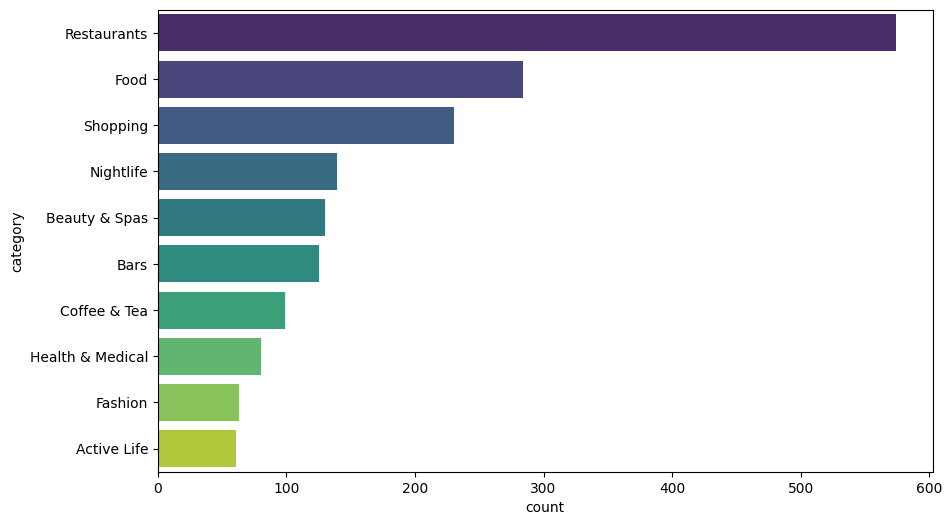

In [ ]:
## Quais são as categorias de estabelecimento?
# Algumas categorias estão 
df_categorias = df_final.groupby('category').size().sort_values(ascending=False).head(10).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='category', data=df_categorias,palette='viridis')

In [ ]:
# Display the final DataFrame
df_final_categories = df_final.drop_duplicates(subset='category')['category']

df_final_categories

0                           Wine Bars
1                  Tapas/Small Plates
2                         Restaurants
3                                Bars
4                           Nightlife
                    ...              
5028                 Tutoring Centers
5075                              NaN
5130                        Ethiopian
5142             Patisserie/Cake Shop
5148    High Fidelity Audio Equipment
Name: category, Length: 504, dtype: object

In [ ]:
df['categories'] = df['categories'].apply(lambda x: str(x).split(','))

In [ ]:
df['categories']

0                [Restaurants,  Chicken Shop,  Fast Food]
1       [Diagnostic Imaging,  Diagnostic Services,  Do...
2       [Party & Event Planning,  Hotels & Travel,  Lo...
3          [Caribbean,  Tapas/Small Plates,  Restaurants]
4          [Specialty Food,  Chocolatiers & Shops,  Food]
                              ...                        
1319                  [Beauty & Spas,  Piercing,  Tattoo]
1320                                    [Food,  Bakeries]
1321    [Arts & Entertainment,  Venues & Event Spaces,...
1322    [Restaurants,  Cafes,  Coffee & Tea,  Coffee R...
1323                                   [Bars,  Nightlife]
Name: categories, Length: 1324, dtype: object

In [ ]:
## A maior parte dos estabelecimentos são restaurantes?
df['is_restaurant'] = df['categories'].apply(lambda x: 'Restaurants' in x)
df['is_restaurant']

0        True
1       False
2       False
3       False
4       False
        ...  
1319    False
1320    False
1321    False
1322     True
1323    False
Name: is_restaurant, Length: 1324, dtype: bool

In [ ]:
df

,business_id,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,is_restaurant
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","[Restaurants, Chicken Shop, Fast Food]",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",True
1,h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,NaN,"[Diagnostic Imaging, Diagnostic Services, Do...",NaN,"{'type': 'Point', 'coordinates': [-79.3768696,...",False
2,AycqWXrDVlbRfJE-kA5MMw,Savour Toronto,NaN,NaN,43.653226,-79.383184,8,1,{'RestaurantsPriceRange2': '3'},"[Party & Event Planning, Hotels & Travel, Lo...",NaN,"{'type': 'Point', 'coordinates': [-79.3831843,...",False
3,EVC1vn1KQ2uETnTbDWXc5w,Cadillac Jenkins,930 Queen Street W,M6J 1G6,43.645042,-79.416121,13,0,"{'RestaurantsReservations': 'False', 'GoodForK...","[Caribbean, Tapas/Small Plates, Restaurants]","{'Tuesday': '17:0-2:0', 'Wednesday': '17:0-2:0...","{'type': 'Point', 'coordinates': [-79.4161208,...",False
4,fdTDe7XIXfhftmgNfR_-3g,Laura Secord,"Toronto Eaton Centre, 220 Yonge Street",M5B 2H1,43.654067,-79.380082,3,0,"{'BusinessParking': ""{'garage': False, 'street...","[Specialty Food, Chocolatiers & Shops, Food]",NaN,"{'type': 'Point', 'coordinates': [-79.3800815,...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,4na5CBQqyWq896-8qOpQ9g,Lucky 13 Tattoo Shop,533 Bloor Street W,M5S 1Y5,43.665395,-79.409607,4,0,"{'BusinessParking': ""{'garage': False, 'street...","[Beauty & Spas, Piercing, Tattoo]",NaN,"{'type': 'Point', 'coordinates': [-79.4096073,...",False
1320,DwG7_vYztZP-AMXEIvGgFA,Christine Cs Shortbread,1 Yonge St,M5E,43.642925,-79.374186,3,1,"{'BusinessParking': ""{'garage': False, 'street...","[Food, Bakeries]",NaN,"{'type': 'Point', 'coordinates': [-79.3741862,...",False
1321,wYZoSBvIbJWvDl-ruZwJ7Q,Harbourfront Centre,235 Queens Quay W,M5J 2G8,43.639069,-79.382896,62,1,{'GoodForKids': 'True'},"[Arts & Entertainment, Venues & Event Spaces,...","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...","{'type': 'Point', 'coordinates': [-79.382896, ...",False
1322,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","[Restaurants, Cafes, Coffee & Tea, Coffee R...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",True
